In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

##### Importing the first DataSet takehome_user_engagement.csv

In [158]:
df1 = pd.read_csv('takehome_user_engagement.csv')
df1

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [159]:
df1.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [160]:
df1.info

<bound method DataFrame.info of                  time_stamp  user_id  visited
0       2014-04-22 03:53:30        1        1
1       2013-11-15 03:45:04        2        1
2       2013-11-29 03:45:04        2        1
3       2013-12-09 03:45:04        2        1
4       2013-12-25 03:45:04        2        1
...                     ...      ...      ...
207912  2013-09-06 06:14:15    11996        1
207913  2013-01-15 18:28:37    11997        1
207914  2014-04-27 12:45:16    11998        1
207915  2012-06-02 11:55:59    11999        1
207916  2014-01-26 08:57:12    12000        1

[207917 rows x 3 columns]>

In [161]:
df1.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

#### Finding the null values in the data set if any

In [162]:
df1.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [163]:
df1

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [164]:
df1[df1['visited']<3]

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [165]:
df1[df1['visited']>2] ## as unable to do as some ids are same so lets make data meaning ful so atht we can process as many cloumns having same ids 

,time_stamp,user_id,visited


In [173]:
df1.time_stamp=pd.to_datetime(df1.time_stamp) ## as nothing no use of this statement
df1

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [174]:
## grouping the userid based on visted by using the parameter timestamp and making as new dataframe
df12=df1.set_index('time_stamp').groupby('user_id')['visited'].resample('D').count()
df12=pd.DataFrame(df12)
df12.head(20)

visited
user_id time_stamp         
1       2014-04-22        1
2       2013-11-15        1
        2013-11-16        0
        2013-11-17        0
        2013-11-18        0
        2013-11-19        0
        2013-11-20        0
        2013-11-21        0
        2013-11-22        0
        2013-11-23        0
        2013-11-24        0
        2013-11-25        0
        2013-11-26        0
        2013-11-27        0
        2013-11-28        0
        2013-11-29        1
        2013-11-30        0
        2013-12-01        0
        2013-12-02        0
        2013-12-03        0

In [175]:
# As we have the data with 1 and o with same id now just making as 7 day period and making the sum
df12 = df12.rolling(window=7, min_periods=1).sum()
df12.reset_index(inplace=True)
df12

,user_id,time_stamp,visited
0,1,2014-04-22,1.0
1,2,2013-11-15,2.0
2,2,2013-11-16,2.0
3,2,2013-11-17,2.0
4,2,2013-11-18,2.0
...,...,...,...
522496,11996,2013-09-06,4.0
522497,11997,2013-01-15,5.0
522498,11998,2014-04-27,6.0
522499,11999,2012-06-02,7.0


**Now we can see that the data is ordered**

In [176]:
df123 = df12.groupby('user_id')[['visited']].max()
df123.head()

,visited
user_id,
1,1.0
2,3.0
3,2.0
4,3.0
5,4.0


##### Now the data is more meaning for next fuether steps and merging with the other dataset so inorder to proceed further we need to have the target column so that we can get the facts out of the in a much better way.

In [177]:
df123.loc[df123['visited'] >= 3, 'adopted_user'] = 1
df123.loc[df123['visited'] < 3, 'adopted_user'] = 0 ## mapping if the visted number is greater than 3 then it is one or ther wise 0
df123['visited'] = df123['visited'].astype(int)
df123['adopted_user'] = df123['adopted_user'].astype(int)
df123.reset_index(inplace=True) 
df123.head()

,user_id,visited,adopted_user
0,1,1,0
1,2,3,1
2,3,2,0
3,4,3,1
4,5,4,1


In [178]:
df123

,user_id,visited,adopted_user
0,1,1,0
1,2,3,1
2,3,2,0
3,4,3,1
4,5,4,1
...,...,...,...
8818,11996,4,1
8819,11997,5,1
8820,11998,6,1
8821,11999,7,1


**As there are about 12000 userids in the processed dataset**

## Importing the second dataset takehome_user.csv and further preprocessing

In [98]:
df2 = pd.read_csv('takehome_users.csv', encoding='latin-1' )
df2

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [99]:
df2.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [100]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [101]:
df2.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

#### Finding the null values in the data set if any

In [102]:
df2.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

**we can see that there are some null values in the columns last_session_creation_time and invited_by_user_id**

In [103]:
df2['last_session_creation_time']  = df2['last_session_creation_time'].replace(to_replace = np.nan,value =0)
df2['invited_by_user_id']  = df2['invited_by_user_id'].replace(to_replace = np.nan,value =0)

In [104]:
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [105]:
df2.isnull().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [106]:
df2

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0.0


### Creating the newcolumn Active Days So that We can use it or the Visulaization for finding the facts about the data

In [107]:
# Doing some feature engineering
df2.creation_time = pd.to_datetime(df2.creation_time)
df2.last_session_creation_time = pd.to_datetime(df2.last_session_creation_time)
df2['active_days'] = df2['creation_time'] -  df2['last_session_creation_time']
df2['active_days'] = df2['active_days'].dt.days
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,16182
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,16024
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,15783
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,15846
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,15722


As the emails are of many just separating the domains so that we can make for the analysisi when we compare with the other parameters

In [110]:
df2['email_domain']=df2['email'].apply(lambda x:x.split('@')[1])
df2['email_domain'].value_counts()

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
                  ... 
lrabg.com            1
mrytw.com            1
ugtav.com            1
hqhll.com            1
iuxiw.com            1
Name: email_domain, Length: 1184, dtype: int64

**we can see that some domains are fake and some are of original**

### Pie Chart Showing the distribution of Domain Name of Email Used By users across the dataset

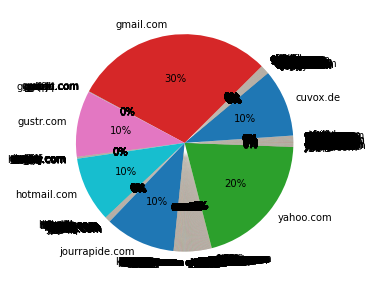

In [111]:
counting_domain_name = df2.groupby(['email_domain']).size()
counting_domain_name = counting_domain_name.to_frame(name = 'size').reset_index()
y = np.array(counting_domain_name['size'])
label = np.array(counting_domain_name['email_domain'])
plt.figure(figsize=(5,5))
plt.pie(y, labels =label, autopct='%1.0f%%')
plt.show()

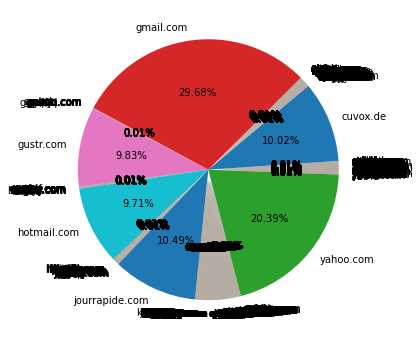

In [112]:
counting_domain_name = df2.groupby(['email_domain']).size()
counting_domain_name = counting_domain_name.to_frame(name = 'size').reset_index()
y = np.array(counting_domain_name['size'])
label = np.array(counting_domain_name['email_domain'])
plt.figure(figsize=(6,6))
plt.pie(y, labels =label, autopct='%0.2f%%')
plt.show()

### Pie Chart Showing the distribution of Creation Scource across the dataset

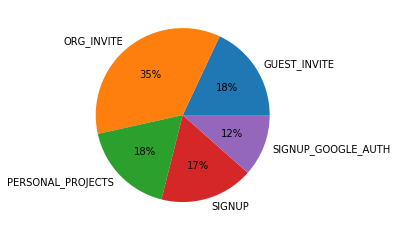

In [113]:
counting_creation_source= df2.groupby(['creation_source']).size()
counting_creation_source = counting_creation_source.to_frame(name = 'size').reset_index()
y = np.array(counting_creation_source['size'])
label = np.array(counting_creation_source['creation_source'])
plt.pie(y, labels =label, autopct='%1.0f%%')
plt.show()

**We can observe that OR_Invite has the highest creation source**

<BarContainer object of 12000 artists>

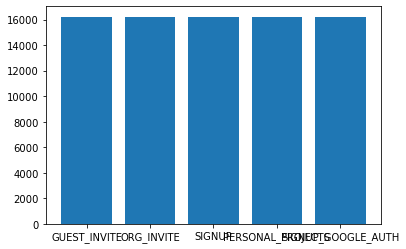

In [114]:
plt.bar(df2['creation_source'],df2['active_days'])

In [115]:
px.bar(df2, x ='email_domain',y = 'active_days',color='creation_source',barmode = 'group')

In [ ]:
### As we havent got much of the facts by visulalizing individulally merging both of tem using the parameters userid and object id

In [118]:
df_merged = pd.merge(df2, df123, left_on='object_id' , right_on='user_id')
df_merged

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,email_domain,index,user_id,visited,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,16182,yahoo.com,0,1,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,16024,gustr.com,1,2,3,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,15783,gustr.com,2,3,2,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,15846,yahoo.com,3,4,3,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,15722,yahoo.com,4,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8818,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1970-01-01 00:00:01.378448055,0,0,89,8263.0,15954,gustr.com,8818,11996,4,1
8819,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1970-01-01 00:00:01.358274517,0,0,200,0.0,15715,gmail.com,8819,11997,5,1
8820,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1970-01-01 00:00:01.398602716,1,1,83,8074.0,16187,cuvox.de,8820,11998,6,1
8821,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1970-01-01 00:00:01.338638159,0,0,6,0.0,15491,iuxiw.com,8821,11999,7,1


In [119]:
df_merged.describe()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,index,user_id,visited,adopted_user
count,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000
mean,6019.821716,0.252295,0.151989,142.572254,3237.316786,15904.155503,4411.000000,6019.821716,5.157316,0.908421
std,3464.251001,0.434354,0.359031,124.176422,3888.088044,215.986725,2547.125046,3464.251001,1.737854,0.288447
min,1.000000,0.000000,0.000000,0.000000,0.000000,15491.000000,0.000000,1.000000,1.000000,0.000000
25%,3017.500000,0.000000,0.000000,30.000000,0.000000,15723.000000,2205.500000,3017.500000,4.000000,1.000000
50%,6034.000000,0.000000,0.000000,109.000000,1055.000000,15926.000000,4411.000000,6034.000000,5.000000,1.000000
75%,9029.500000,1.000000,0.000000,239.000000,6405.000000,16099.500000,6616.500000,9029.500000,7.000000,1.000000
max,12000.000000,1.000000,1.000000,416.000000,11999.000000,16220.000000,8822.000000,12000.000000,7.000000,1.000000


In [120]:
df_merged.dtypes

object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
active_days                            int64
email_domain                          object
index                                  int64
user_id                                int64
visited                                int32
adopted_user                           int32
dtype: object

In [122]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   8823 non-null   int64         
 1   creation_time               8823 non-null   datetime64[ns]
 2   name                        8823 non-null   object        
 3   email                       8823 non-null   object        
 4   creation_source             8823 non-null   object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    8823 non-null   int64         
 7   enabled_for_marketing_drip  8823 non-null   int64         
 8   org_id                      8823 non-null   int64         
 9   invited_by_user_id          8823 non-null   float64       
 10  active_days                 8823 non-null   int64         
 11  email_domain                8823 non-null   object      

In [123]:
df_merged.isnull().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
active_days                   0
email_domain                  0
index                         0
user_id                       0
visited                       0
adopted_user                  0
dtype: int64

## As no column having null values we will proceed with the oter things which needed to be done this new data

###### Just further more we can split the week, days, month, year

For that we need the time stap which is not avilable in the currect data so just getting or sepating it from first data set and again merging the dataset

0        2014-04-22 03:53:30
1        2013-11-15 03:45:04
2        2013-11-29 03:45:04
3        2013-12-09 03:45:04
4        2013-12-25 03:45:04
                 ...        
207912   2013-09-06 06:14:15
207913   2013-01-15 18:28:37
207914   2014-04-27 12:45:16
207915   2012-06-02 11:55:59
207916   2014-01-26 08:57:12
Name: time_stamp, Length: 207917, dtype: datetime64[ns]

In [149]:
df_merged['date'] = df_merged['time_stamp'].astype('datetime64') ## splitting the date
df_merged['week'] = df_merged['date'].dt.isocalendar().week ## splitting the weeks
df_merged['year'] = df_merged['date'].dt.isocalendar().year ## splitting the year
df_merged['month'] = df_merged['date'].dt.month ## splitting the month
df_merged

KeyError: 'time_stamp'

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'GUEST_INVITE'),
  Text(1, 0, 'ORG_INVITE'),
  Text(2, 0, 'SIGNUP'),
  Text(3, 0, 'PERSONAL_PROJECTS'),
  Text(4, 0, 'SIGNUP_GOOGLE_AUTH')])

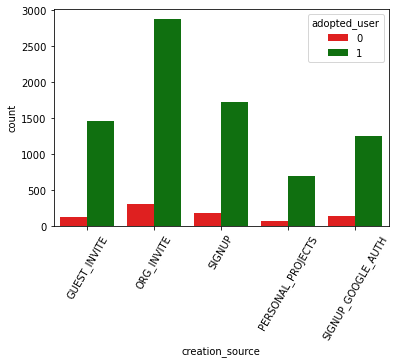

In [135]:
sns.countplot(x="creation_source", data=df_merged,hue='adopted_user',palette=['red','green'])
plt.xticks(rotation=60)

NameError: name 'groupby_week' is not defined

In [139]:
df_merged.corr()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,index,user_id,visited,adopted_user
object_id,1.000000,-0.034920,-0.028916,0.002285,0.003493,0.021655,0.999984,1.000000,-0.016796,-0.005888
opted_in_to_mailing_list,-0.034920,1.000000,0.488219,-0.002421,0.010839,0.003144,-0.034817,-0.034920,0.002675,-0.000132
enabled_for_marketing_drip,-0.028916,0.488219,1.000000,0.000538,-0.000173,0.003440,-0.028852,-0.028916,-0.005806,-0.002400
org_id,0.002285,-0.002421,0.000538,1.000000,-0.042723,0.001083,0.002224,0.002285,0.020094,-0.004591
invited_by_user_id,0.003493,0.010839,-0.000173,-0.042723,1.000000,0.000313,0.003437,0.003493,-0.003695,0.004756
active_days,0.021655,0.003144,0.003440,0.001083,0.000313,1.000000,0.021667,0.021655,-0.042545,-0.005639
index,0.999984,-0.034817,-0.028852,0.002224,0.003437,0.021667,1.000000,0.999984,-0.016616,-0.005822
user_id,1.000000,-0.034920,-0.028916,0.002285,0.003493,0.021655,0.999984,1.000000,-0.016796,-0.005888
visited,-0.016796,0.002675,-0.005806,0.020094,-0.003695,-0.042545,-0.016616,-0.016796,1.000000,0.577103
adopted_user,-0.005888,-0.000132,-0.002400,-0.004591,0.004756,-0.005639,-0.005822,-0.005888,0.577103,1.000000


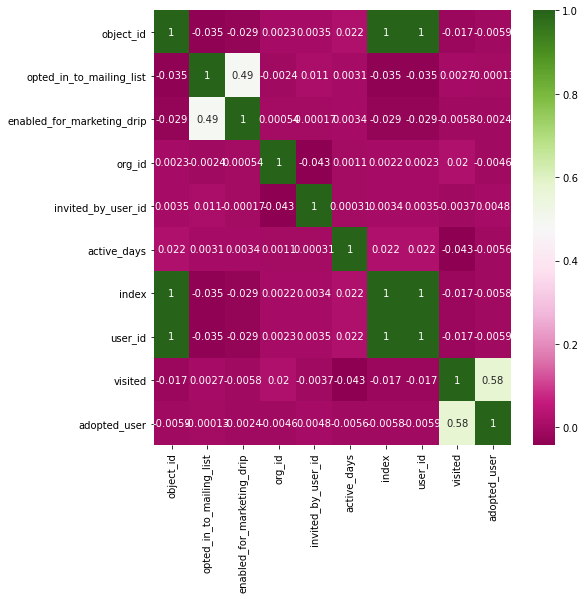

In [141]:
## Generating the Heat Map so that we can get more about the variables

correlation_of_variables = df_merged.corr()
top_features = correlation_of_variables.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(df_merged[top_features].corr(),annot=True,cmap="PiYG")

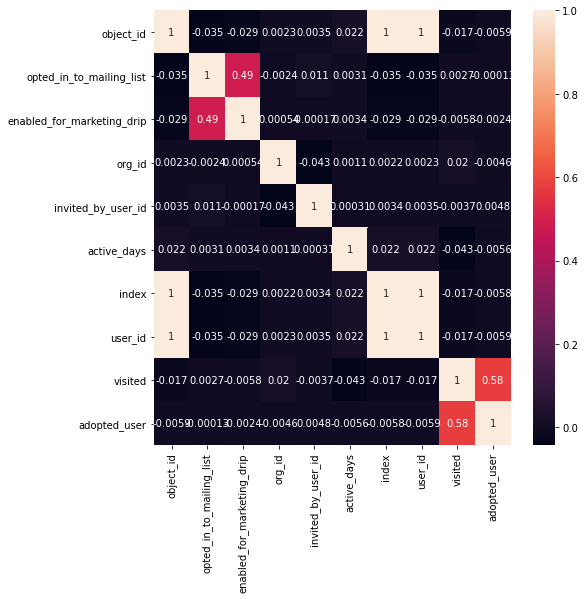

In [144]:
## Generating the Heat Map so that we can get more about the variables

correlation_of_variables = df_merged.corr()
top_features = correlation_of_variables.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(df_merged[top_features].corr(),annot=True)
sns.color_palette("viridis", as_cmap=True)

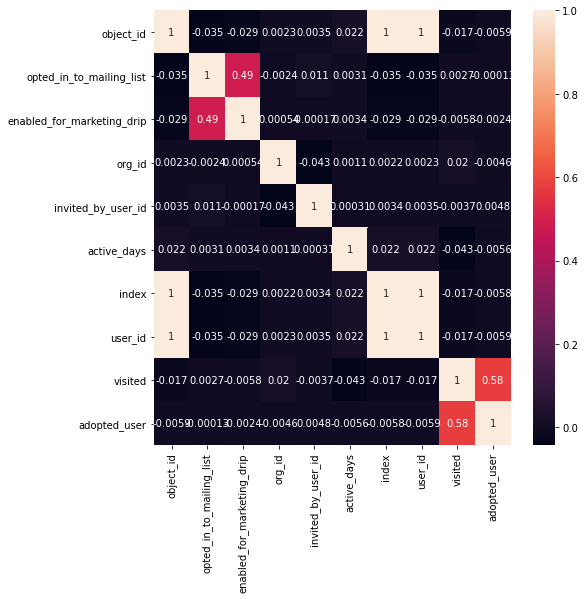

In [145]:
## Generating the Heat Map so that we can get more about the variables

correlation_of_variables = df_merged.corr()
top_features = correlation_of_variables.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(df_merged[top_features].corr(),annot=True)
sns.color_palette("Spectral", as_cmap=True)

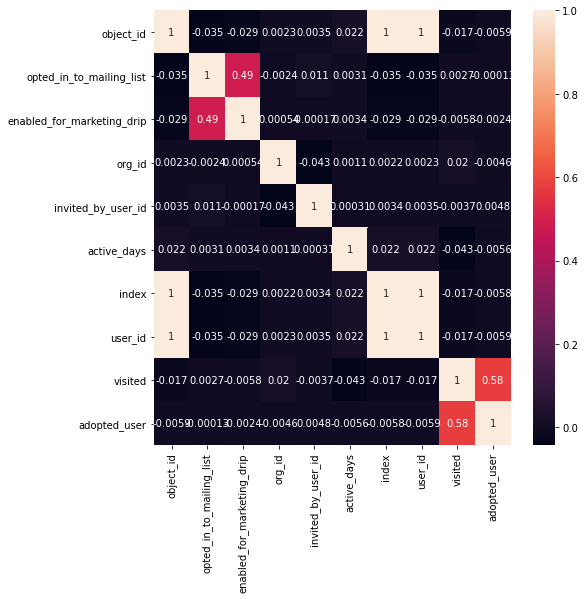

In [146]:
## Generating the Heat Map so that we can get more about the variables

correlation_of_variables = df_merged.corr()
top_features = correlation_of_variables.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(df_merged[top_features].corr(),annot=True)
sns.diverging_palette(145, 300, s=60, as_cmap=True)

**I have generated many maps to see which matches better by refering the officila documentation in the website of seaborn**
https://seaborn.pydata.org/tutorial/color_palettes.html

### As per my observation i can see that the org_id, invited_by_user_ids

#### Additional Research on Data1 i.e takehome_user_engagement.csv

In [180]:
# As we have the data with 1 and o with same id now just making as 7 day period and making the sum
df1.time_stamp=pd.to_datetime(df1.time_stamp) ## as nothing no use of this statement
## grouping the userid based on visted by using the parameter timestamp and making as new dataframe
df12=df1.set_index('time_stamp').groupby('user_id')['visited'].resample('D').count()
df12=pd.DataFrame(df12)
df12 = df12.rolling(window=7, min_periods=1).sum()
df12.reset_index(inplace=True)
df12

,user_id,time_stamp,visited
0,1,2014-04-22,1.0
1,2,2013-11-15,2.0
2,2,2013-11-16,2.0
3,2,2013-11-17,2.0
4,2,2013-11-18,2.0
...,...,...,...
522496,11996,2013-09-06,4.0
522497,11997,2013-01-15,5.0
522498,11998,2014-04-27,6.0
522499,11999,2012-06-02,7.0


In [181]:
df12['date'] = df12['time_stamp'].astype('datetime64')
df12['week'] = df12['date'].dt.isocalendar().week
df12['year'] = df12['date'].dt.isocalendar().year
df12['month'] = df12['date'].dt.month
df12.head()

,user_id,time_stamp,visited,date,week,year,month
0,1,2014-04-22,1.0,2014-04-22,17,2014,4
1,2,2013-11-15,2.0,2013-11-15,46,2013,11
2,2,2013-11-16,2.0,2013-11-16,46,2013,11
3,2,2013-11-17,2.0,2013-11-17,46,2013,11
4,2,2013-11-18,2.0,2013-11-18,47,2013,11


In [182]:
# grouping the user_ids, visited,date,week,year,month inorder to eliminate the time_stamp
df12 = df12.groupby(['user_id','week','month','year'])['visited'].count().reset_index()
df12

,user_id,week,month,year,visited
0,1,17,4,2014,1
1,2,1,1,2014,5
2,2,1,12,2014,2
3,2,2,1,2014,7
4,2,3,1,2014,7
...,...,...,...,...,...
97663,11996,36,9,2013,1
97664,11997,3,1,2013,1
97665,11998,17,4,2014,1
97666,11999,22,6,2012,1


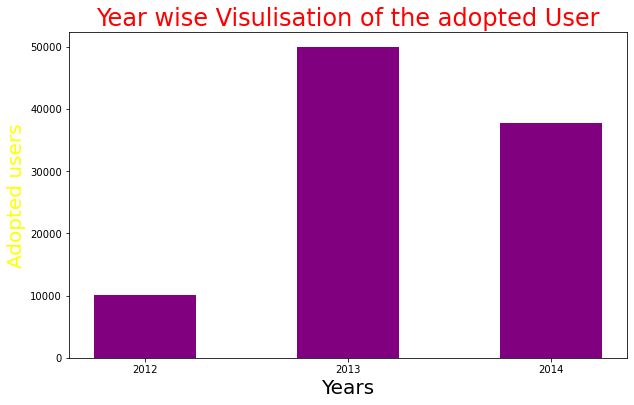

In [192]:
x = ['2012','2013','2014']
q= df12.year.value_counts()
y = [q[2012],q[2013],q[2014]]
plt.figure(figsize=(10,6))
plt.bar(x,y,color='purple',width=0.5)
plt.xlabel("Years",color='black',fontsize=20)
plt.ylabel("Adopted users",color='yellow',fontsize=20)
plt.title("Year wise Visulisation of the adopted User",color='red',fontsize=24)
plt.show()

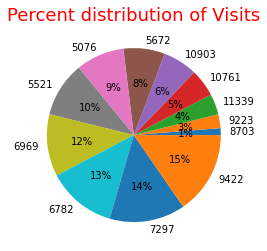

In [193]:
x = df12.groupby(['month']).size().values
y = df12.groupby(['month']).size().index
x = np.array(x)
y = np.array(y)
plt.pie(y, labels = x, autopct='%1.0f%%')
plt.title("Percent distribution of Visits", color = 'Red',fontsize=18)
plt.show()
